# Testing Mask R CNN

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
import os
import sys

ROOT_DIR = os.path.abspath("/content/Mask_RCNN")
sys.path.append(ROOT_DIR)
sys.path


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN']

In [ ]:
"""
numpy
scipy
Pillow
cython
matplotlib
scikit-image
tensorflow==1.3.0
keras==2.0.8
opencv-python
h5py
imgaug
IPython[all]
"""

## After pip install do 'restart runtime"

In [ ]:
pip install -r /content/Mask_RCNN/requirements.txt

In [ ]:
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

##If tf version is 2.4.1 then you will get below error
#AttributeError: module 'tensorflow' has no attribute 'log'

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarning: Passing (type, 1) or 

1.3.0
2.0.8


In [ ]:
from mrcnn import utils 
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (768, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


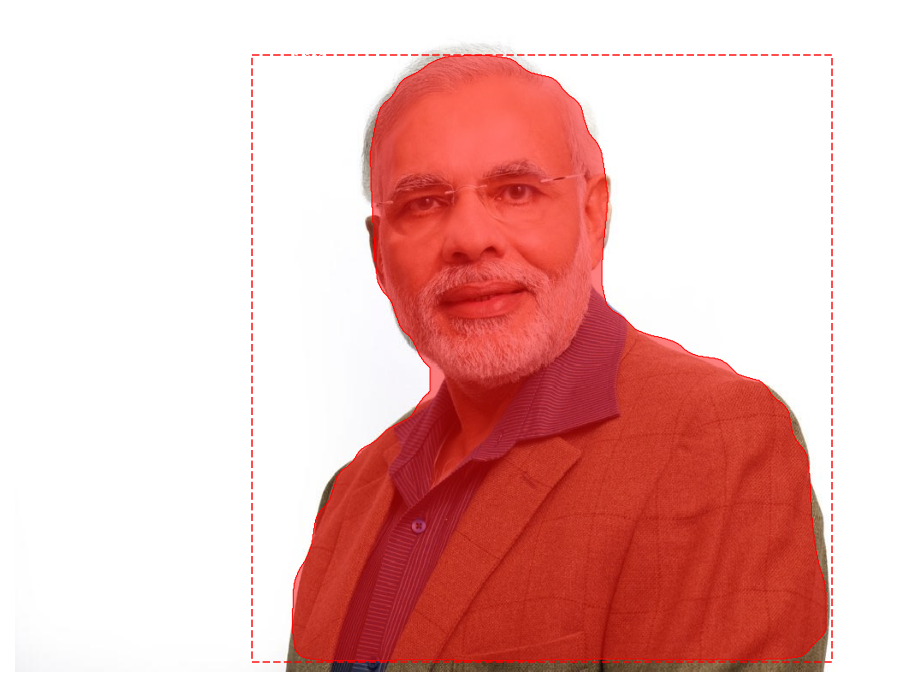

40.42169666290283 sec


In [ ]:
import time

x = time.time()

# Load a random image from the images folder
image = skimage.io.imread('/content/modi.jpg')

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

y = time.time()

print(y-x , "sec")

In [ ]:
results[0].keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])

In [ ]:
results[0]

{'class_ids': array([1], dtype=int32), 'masks': array([[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        ...,
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]]), 'rois': array([[ 46, 276, 756, 954]], dtype=int32), 'scores': array([0.99997234], dtype=float32)}

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


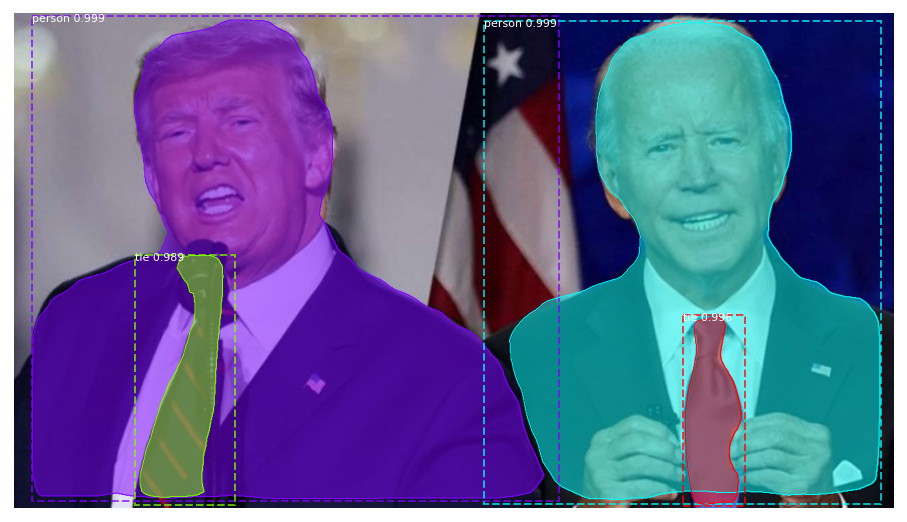

40.50501322746277 sec


In [ ]:
import time

x = time.time()

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread("/content/trump-biden.jpg")

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

y = time.time()

print(y-x , "sec")

In [ ]:
results[0].keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])

In [ ]:
results[0]

{'class_ids': array([ 1,  1, 28, 28], dtype=int32),
 'masks': array([[[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]],
 
        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]],
 
        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]],
 
        ...,
 
        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
 

Processing 1 images
image                    shape: (393, 630, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


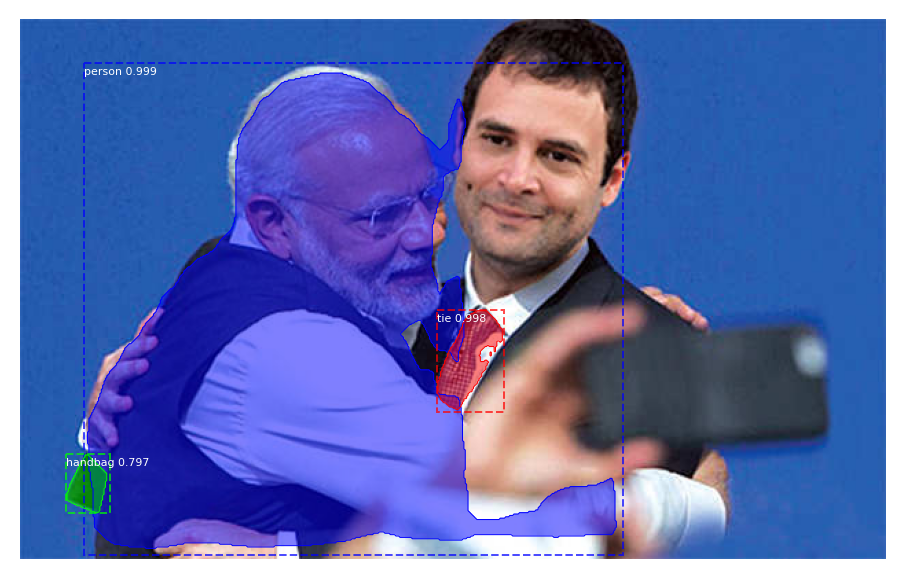

40.074384450912476 sec


In [ ]:
import time

x = time.time()



# Load a random image from the images folder
image = skimage.io.imread("/content/modi_rahul.jpg")

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

y = time.time()

print(y-x , "sec")

Processing 1 images
image                    shape: (428, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


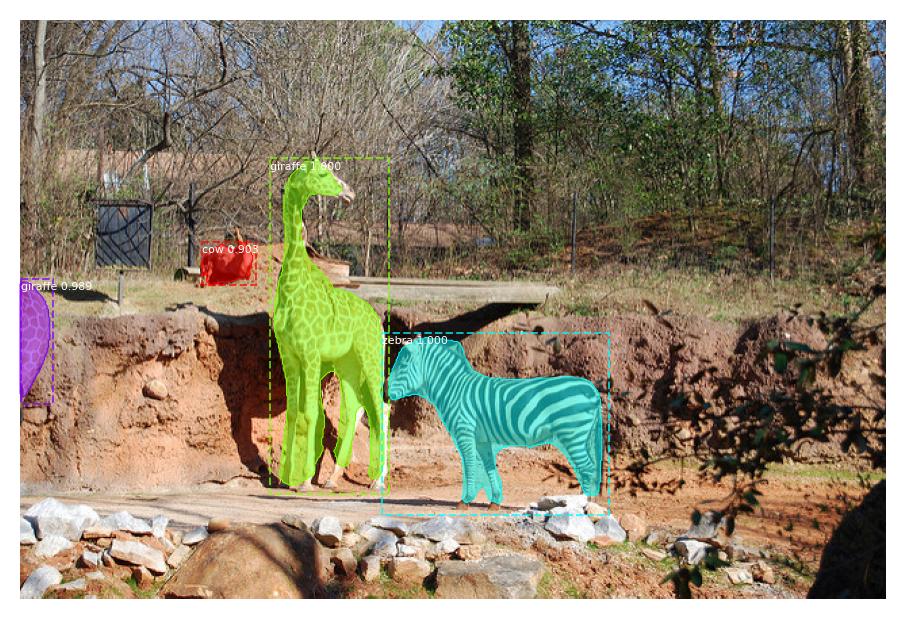

40.18436312675476 sec


In [ ]:
x = time.time()



# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

y = time.time()

print(y-x , "sec")

In [ ]:
os.path.join(IMAGE_DIR, random.choice(file_names))

'/content/Mask_RCNN/images/2502287818_41e4b0c4fb_z.jpg'

Processing 1 images
image                    shape: (853, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


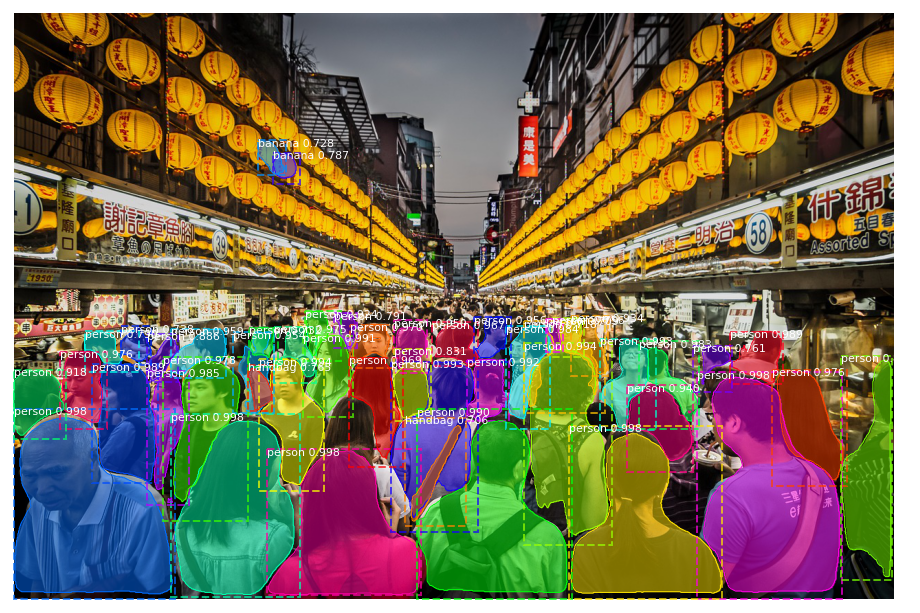

42.99677276611328 sec


In [ ]:
x = time.time()

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread('/content/night-market.jpg')

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

y = time.time()

print(y-x , "sec")

In [ ]:
results[0]

{'class_ids': array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1, 47, 27,  1,  1,  1,  1, 47,  1,  1, 27], dtype=int32),
 'masks': array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, Fals

Processing 1 images
image                    shape: (1261, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


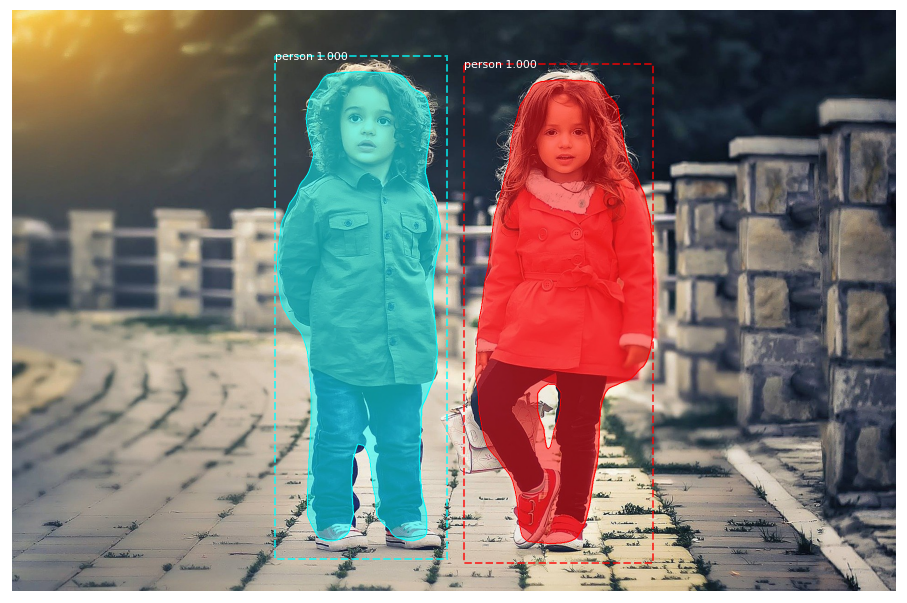

40.38016486167908 sec


In [ ]:
x = time.time()

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread('/content/children-817368_1920.jpg')

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

y = time.time()

print(y-x , "sec")

In [ ]:
results

[{'class_ids': array([1, 1], dtype=int32), 'masks': array([[[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         ...,
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
      

In [ ]:
x = time.time()

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread('/content/children-817368_1920.jpg')

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
results[0]
#visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
#                            class_names, r['scores'])

y = time.time()

print(y-x , "sec")

Processing 1 images
image                    shape: (1261, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
39.594515562057495 sec


In [ ]:
results

[{'class_ids': array([1, 1], dtype=int32), 'masks': array([[[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         ...,
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
      

In [ ]:
results[0]['masks'][0].shape

(1920, 2)

In [ ]:
results[0]['masks'][3].shape

(1920, 2)

In [ ]:
results[0].values()

dict_values([array([[ 115,  982, 1199, 1394],
       [  97,  572, 1192,  945]], dtype=int32), array([1, 1], dtype=int32), array([0.99987686, 0.9997558 ], dtype=float32), array([[[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       ...,

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False]